In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.predict(
   source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
   conf=0.25
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 97.6MB/s]


100%|██████████| 104k/104k [00:00<00:00, 39.8MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 95.1ms
Speed: 13.7ms preprocess, 95.1ms inference, 856.3ms postprocess per image at shape (1, 3, 640, 384)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oRjunPpjZRqcGVpQOcJ2")
project = rf.workspace("su2").project("car-accidents-volbk")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Accidents-1 in yolov8:: 100%|██████████| 5006/5006 [00:01<00:00, 4059.72it/s]


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 116MB/s] 
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Car-Accidents-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [10]:
from ultralytics import YOLO

from IPython.display import display, Image

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/content


/content


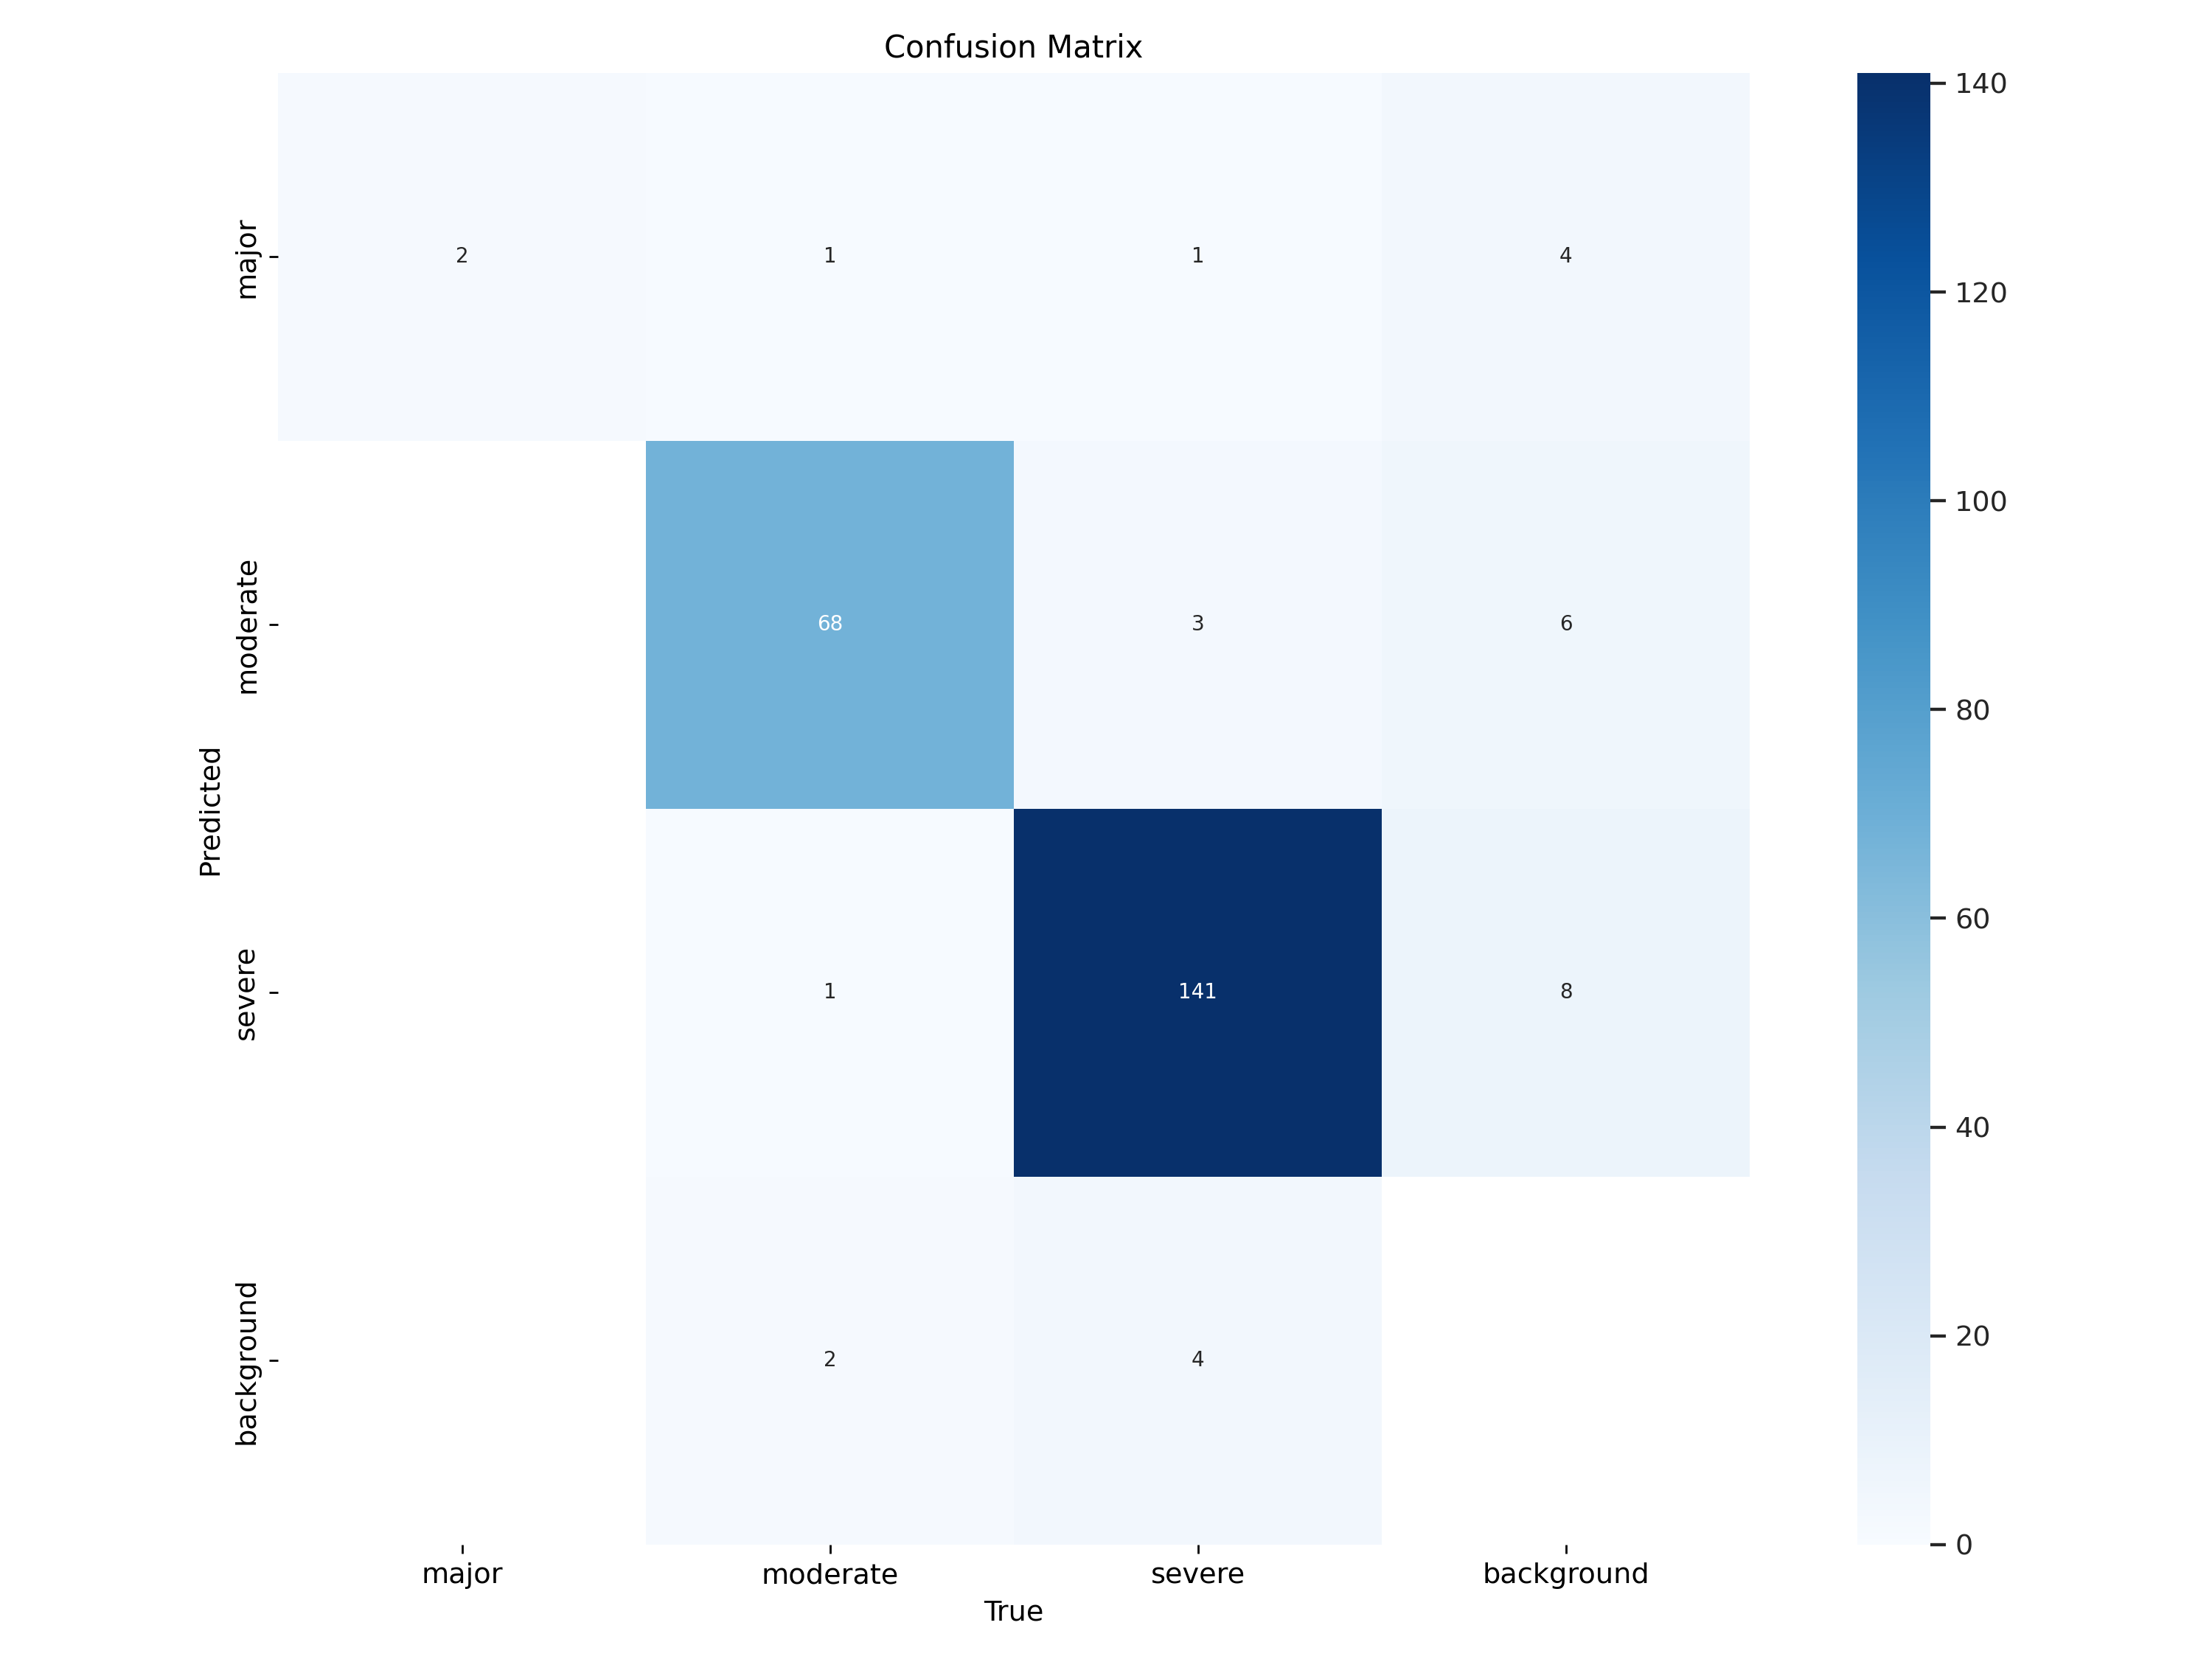

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


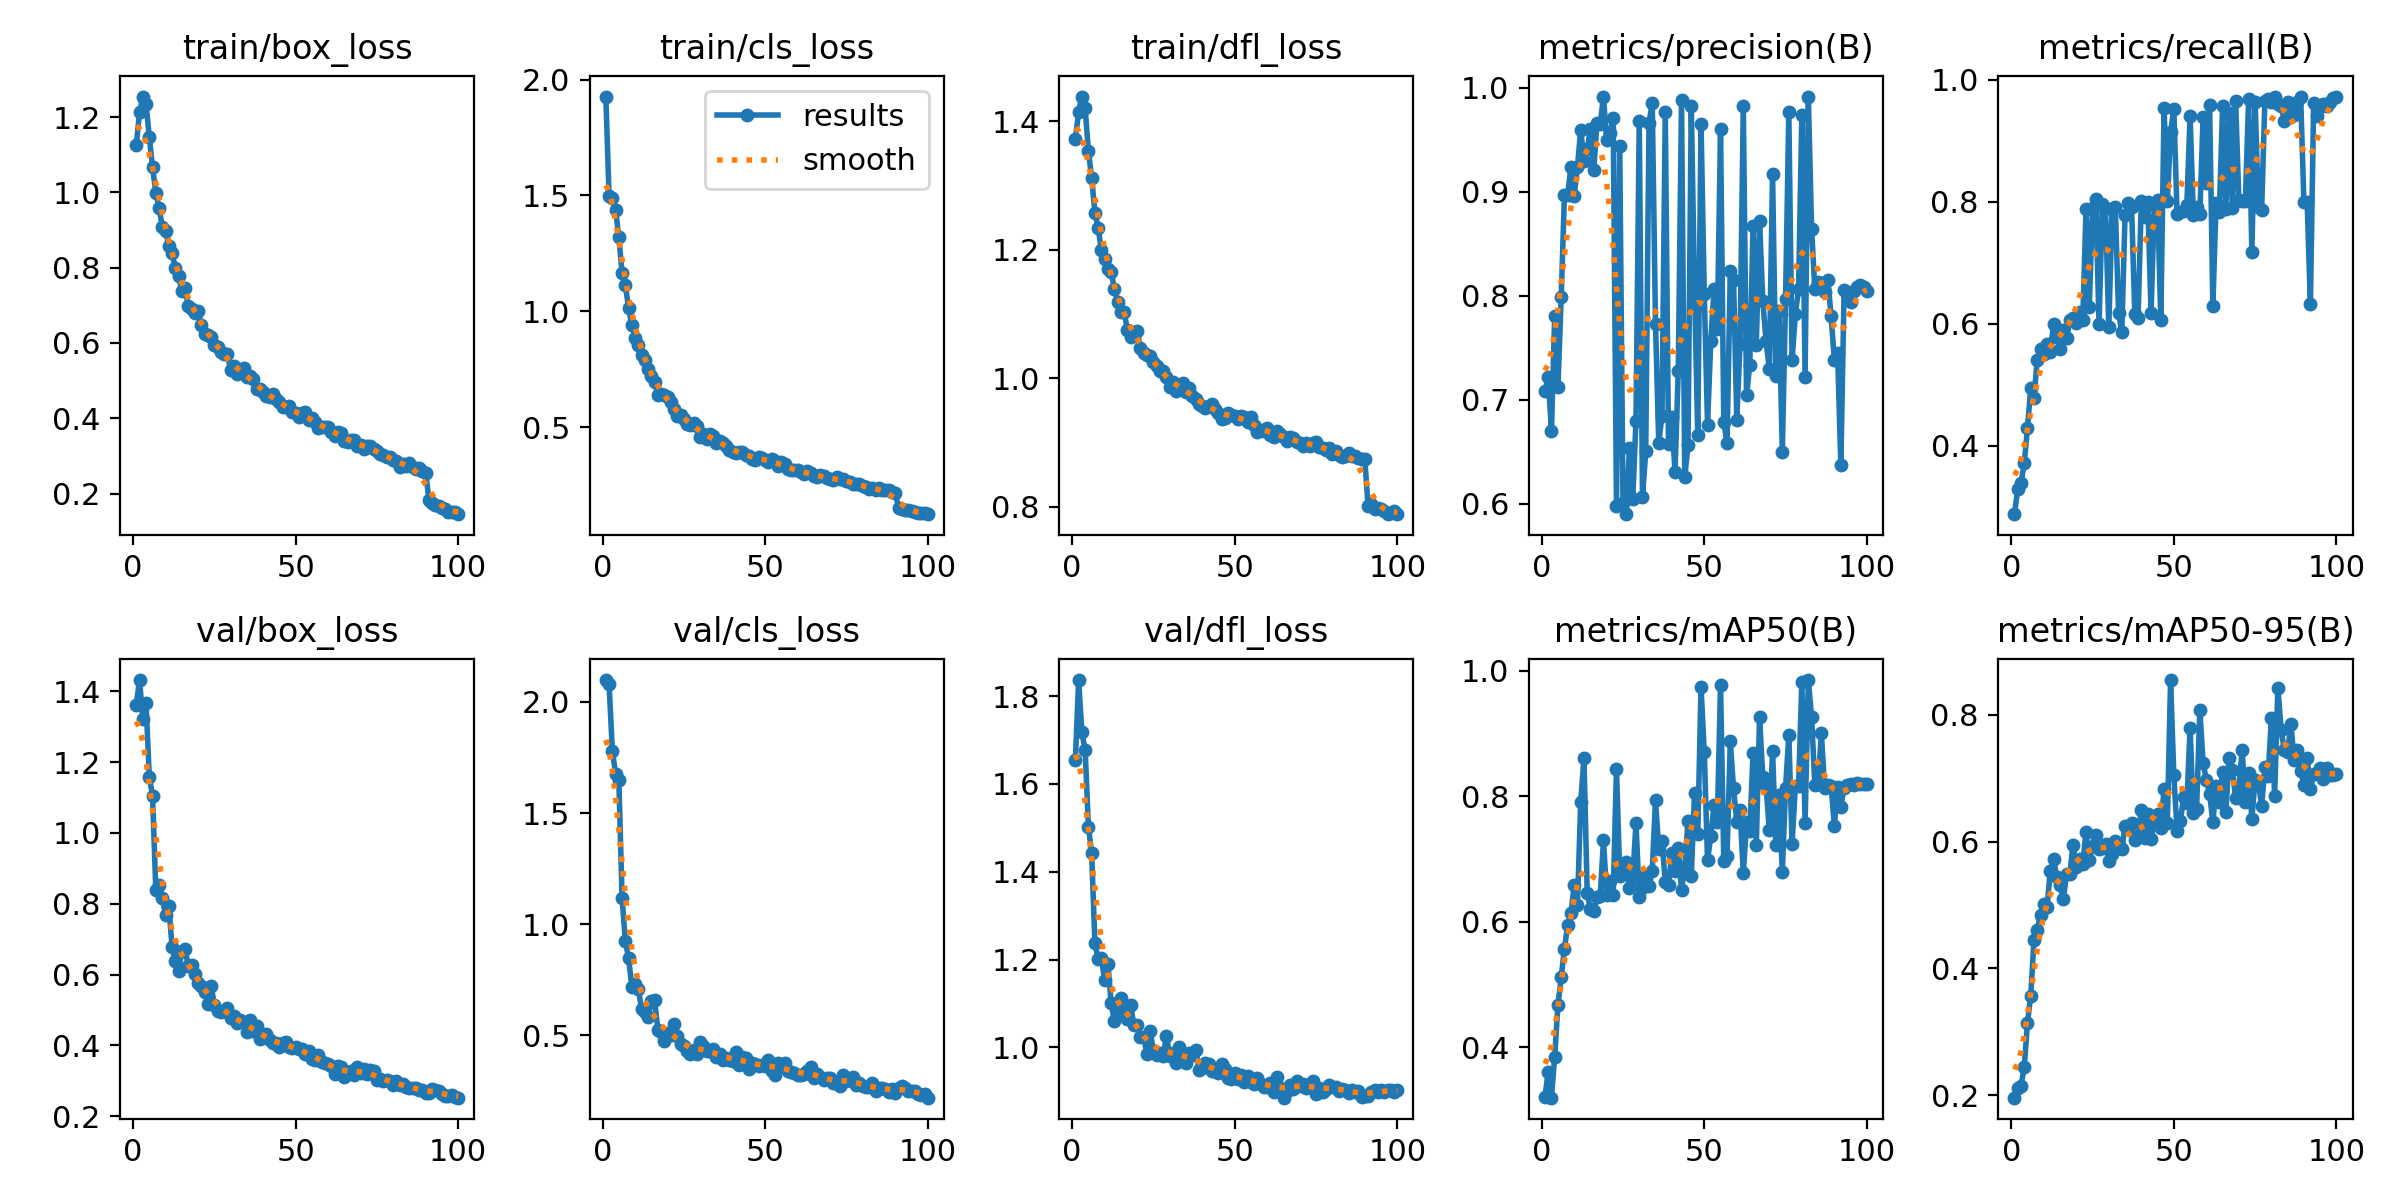

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


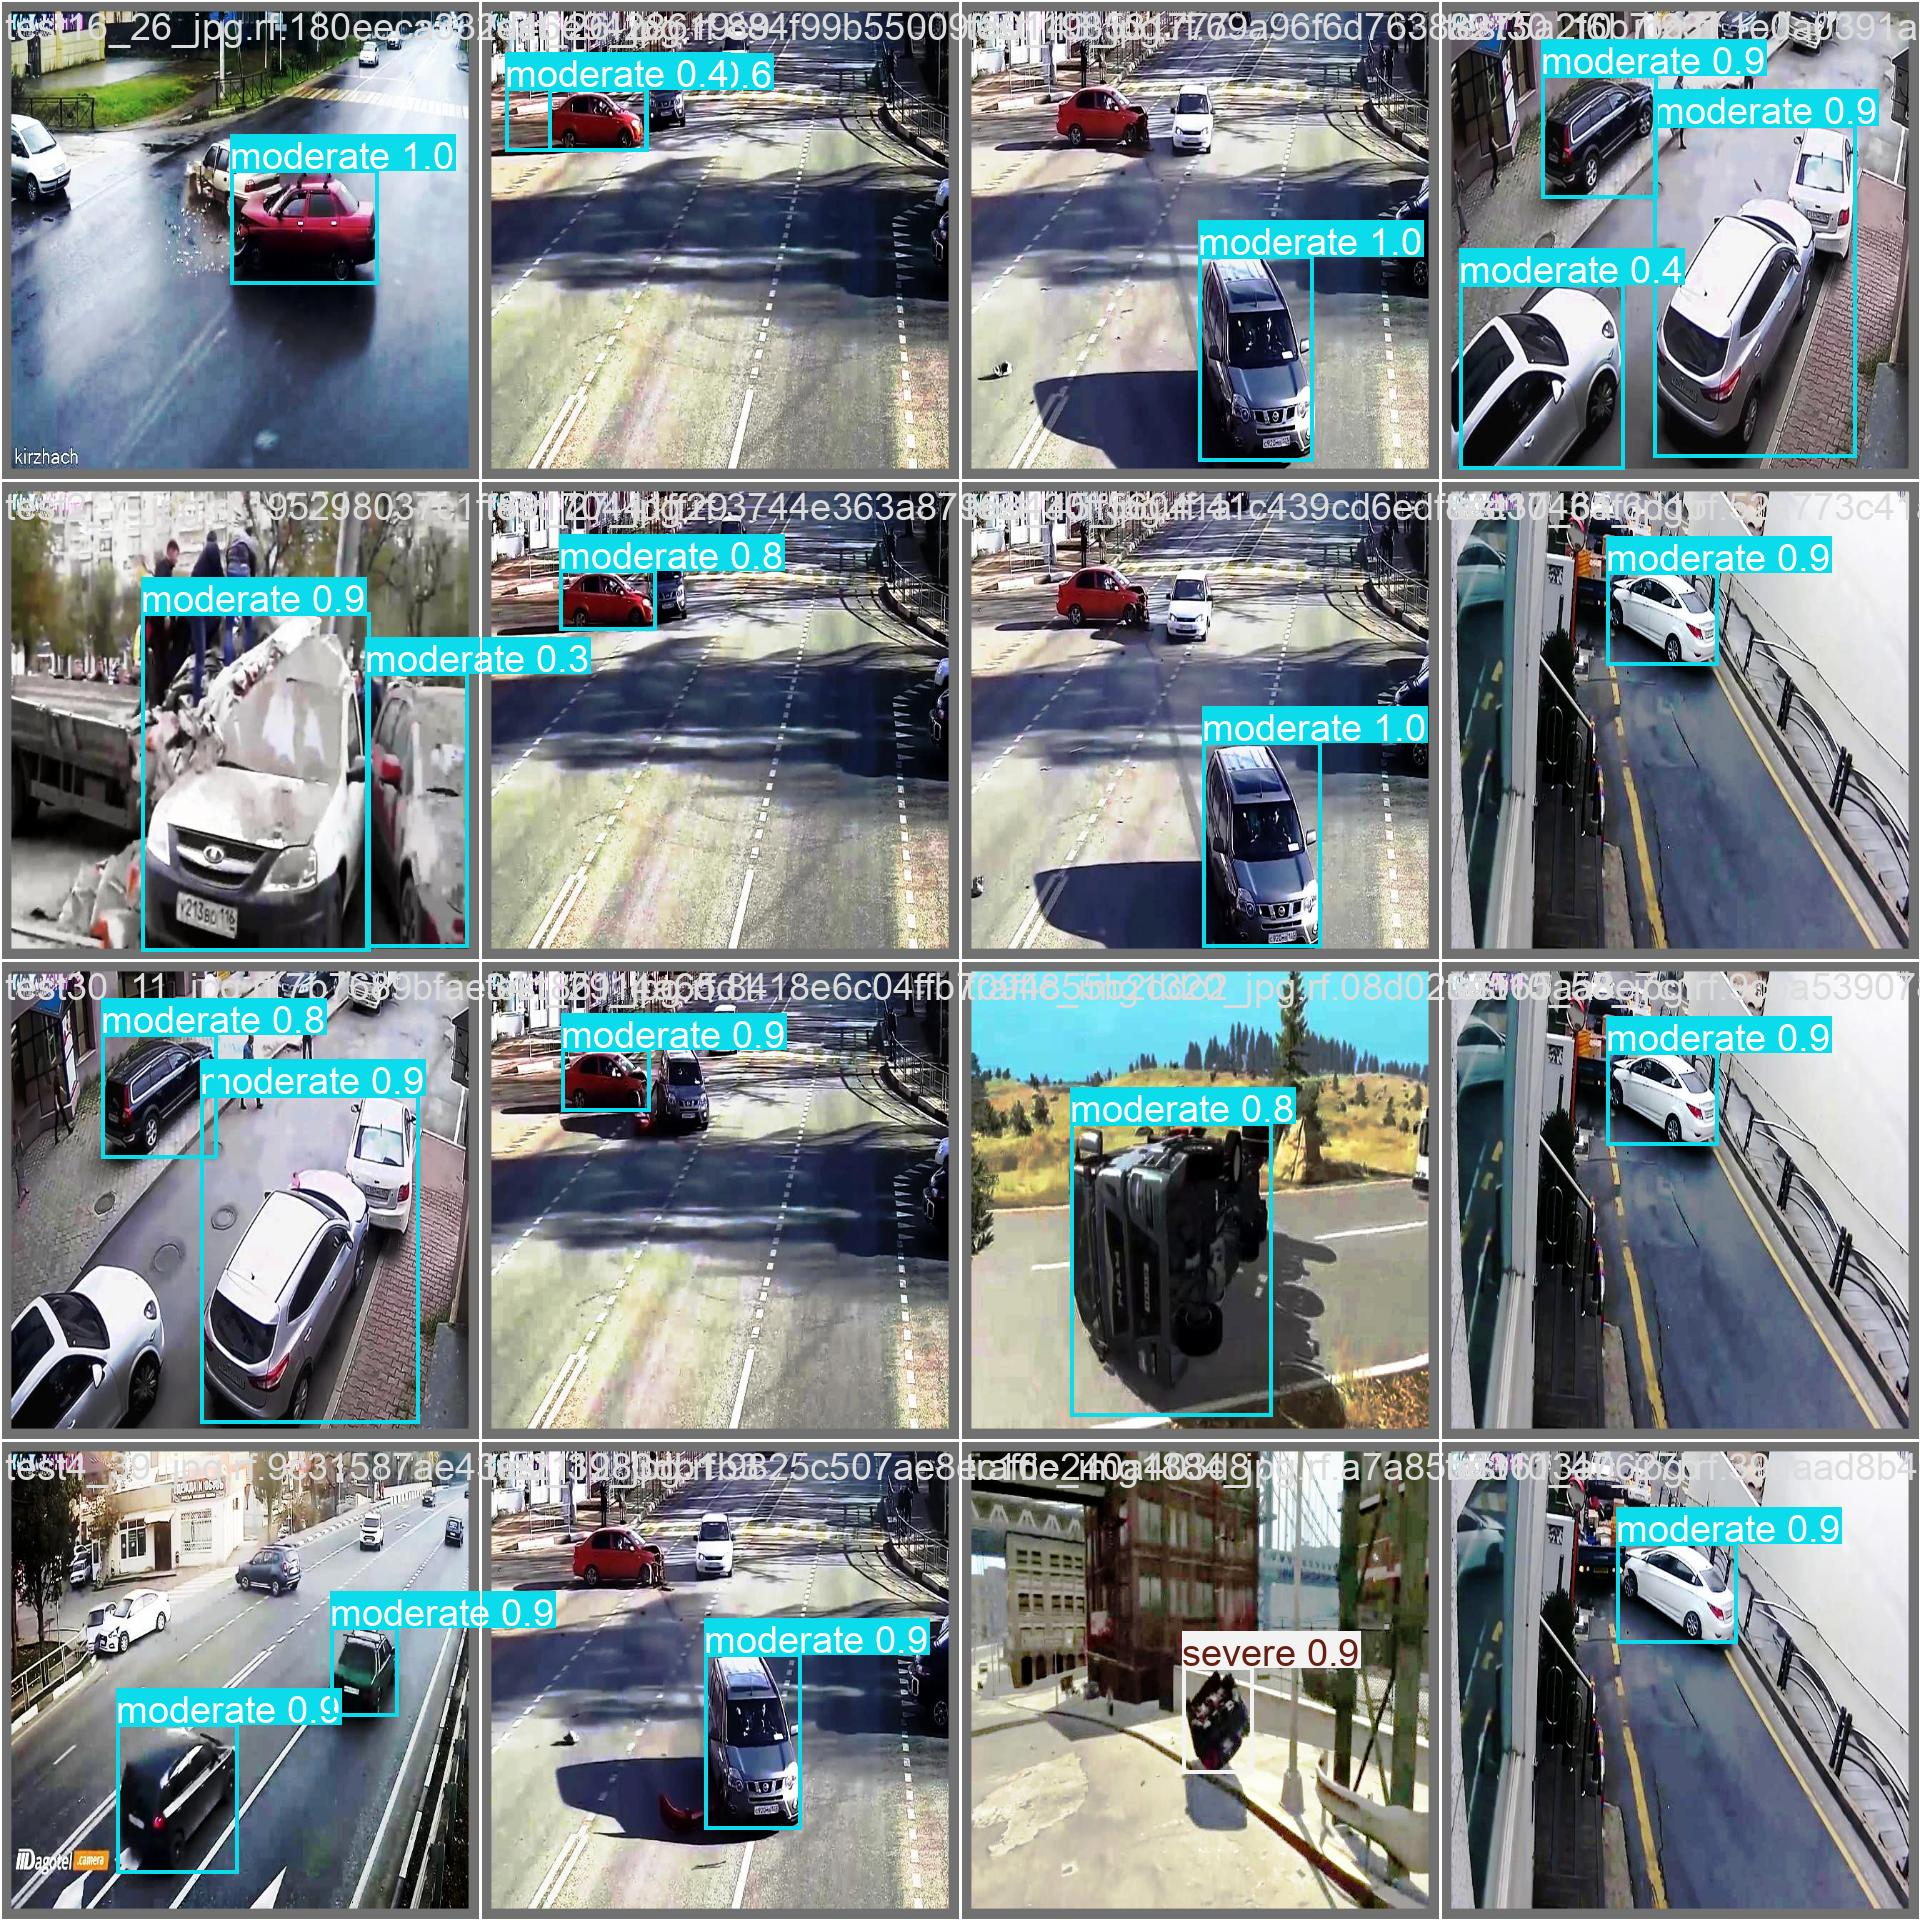

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

In [20]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Car-Accidents-1/valid/labels.cache... 211 images, 0 backgrounds, 0 corrupt: 100% 211/211 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:04<00:00,  3.14it/s]
                   all        211        223      0.965      0.914      0.975      0.855
                 major          2          2          1      0.885      0.995      0.746
              moderate         69         72      0.927      0.931      0.955        0.9
                severe        141        149      0.968      0.926      0.975      0.919
Speed: 2.2ms preprocess, 9.8ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/105 /content/Car-Accidents-1/test/images/10-74_jpg.rf.3819c9972a7db61fc34cf1c1dff2925c.jpg: 640x640 2 moderates, 16.3ms
image 2/105 /content/Car-Accidents-1/test/images/10-74_jpg.rf.6074ce9c77fee8ed1e189fa834a5f15e.jpg: 640x640 2 moderates, 16.3ms
image 3/105 /content/Car-Accidents-1/test/images/10-79_jpg.rf.a93202c866e32e03e1092c867fd7ec02.jpg: 640x640 1 moderate, 16.2ms
image 4/105 /content/Car-Accidents-1/test/images/1001_jpeg_jpg.rf.c5f2c03a3923392e0ad515c8d48e1570.jpg: 640x640 2 severes, 16.2ms
image 5/105 /content/Car-Accidents-1/test/images/1030_jpeg_jpg.rf.845cbb84028327ef6c38fcbe8626955e.jpg: 640x640 2 severes, 16.2ms
image 6/105 /content/Car-Accidents-1/test/images/1042_jpeg_jpg.rf.dd485ae4e0df434f56481041f3518acc.jpg: 640x640 1 severe, 16.2ms
image 7/105 /content/Car-Accidents-1/test/images/1083

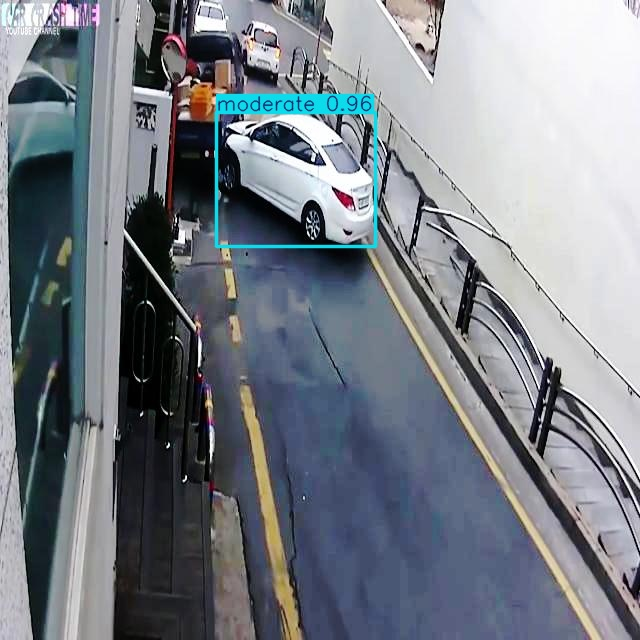

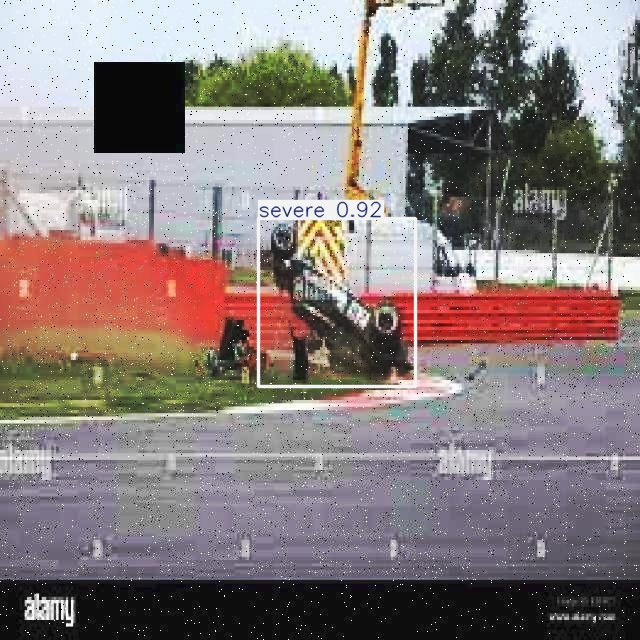

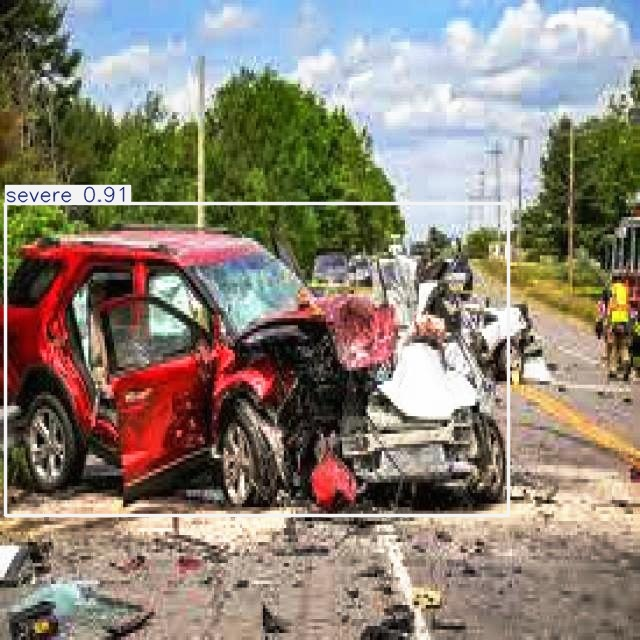

In [26]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [23]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")


Dependency ultralytics==8.0.196 is required but found version=8.3.36, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [24]:
dataset.version

'1'